In [1]:
import os
from os.path import isdir, join
from pathlib import Path


#Scientific Library
import numpy as np
import pandas as pd
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from scipy.misc import imread

# Visualization Library
import matplotlib.pyplot as plt
import tensorflow as tf
import IPython.display as ipd
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
    
%matplotlib inline

10 classes from the list : 
yes, no, up, down, left, right, on, off, stop, go

2 classes below :
1. 6 pictures from silence
2. everything else to unknown

Take 400 pictures from each class above - 4000 total
and from the rest of 20 classes, take 20 pictures from each - 400 pictures for unknown

Possible Data Augmentation on 6 pictures for silence

-> for now, total of 4000 + 400 + 6 = 4406 pictures.
Everything in order.

In [2]:
cat = os.listdir('../input/audio/cat')
down = os.listdir('../input/audio/down')
four = os.listdir('../input/audio/four')
house = os.listdir('../input/audio/house')
nine = os.listdir('../input/audio/nine')
on = os.listdir('../input/audio/on')
seven = os.listdir('../input/audio/seven')
stop = os.listdir('../input/audio/stop')
two = os.listdir('../input/audio/two')
yes = os.listdir('../input/audio/yes')
bed = os.listdir('../input/audio/bed')
eight = os.listdir('../input/audio/eight')
go = os.listdir('../input/audio/go')
left = os.listdir('../input/audio/left')
no = os.listdir('../input/audio/no')
one = os.listdir('../input/audio/one')
sheila = os.listdir('../input/audio/sheila')
three = os.listdir('../input/audio/three')
up = os.listdir('../input/audio/up')
zero = os.listdir('../input/audio/zero')
bird = os.listdir('../input/audio/bird')
dog = os.listdir('../input/audio/dog')
five = os.listdir('../input/audio/five')
happy = os.listdir('../input/audio/happy')
marvin = os.listdir('../input/audio/marvin')
off = os.listdir('../input/audio/off')
right = os.listdir('../input/audio/right')
six = os.listdir('../input/audio/six')
tree = os.listdir('../input/audio/tree')
wow = os.listdir('../input/audio/wow')
silence = os.listdir('../input/audio/silence')

In [3]:
print(len(yes))

2377


by doing ls -R | wc -l, found out there are total of 64823 spectrogram. We will put in 100 from each first.

In [4]:
#no[2]

In [5]:
#data = np.empty((100,129,256), dtype=np.float32)

In [6]:
#index=0
#image_name_list = sheila
#for image_name in image_name_list[:100]:
#    imageA = plt.imread('../input/audio/sheila/' + image_name)
#    data[index] = imageA
#    index+=1

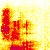

In [7]:
from PIL import Image
a=Image.open('../input/audio/sheila/' + sheila[9]).resize((50,50))
a

In [8]:
#Convert Yes Spectrogram Images to Pixels

data = np.empty((4800,50,50), dtype=np.float32)

# top 10

index = 0
image_name_list = yes
for image_name in image_name_list[:400]:
    imageA = Image.open('../input/audio/yes/' + image_name).resize((50,50))
    data[index] = imageA
    index+=1
    
image_name_list = no
for image_name in image_name_list[:400]:
    imageA = Image.open('../input/audio/no/' + image_name).resize((50,50))
    data[index] = imageA
    index+=1
        
image_name_list = up
for image_name in image_name_list[:400]:
    imageA = Image.open('../input/audio/up/' + image_name).resize((50,50))
    data[index] = imageA
    index+=1
    
image_name_list = down
for image_name in image_name_list[:400]:
    imageA = Image.open('../input/audio/down/' + image_name).resize((50,50))
    data[index] = imageA
    index+=1
    
image_name_list = left
for image_name in image_name_list[:400]:
    imageA = Image.open('../input/audio/left/' + image_name).resize((50,50))
    data[index] = imageA
    index+=1
    
image_name_list = right
for image_name in image_name_list[:400]:
    imageA = Image.open('../input/audio/right/' + image_name).resize((50,50))
    data[index] = imageA
    index+=1
    
image_name_list = on
for image_name in image_name_list[:400]:
    imageA = Image.open('../input/audio/on/' + image_name).resize((50,50))
    data[index] = imageA
    index+=1
    
image_name_list = off
for image_name in image_name_list[:400]:
    imageA = Image.open('../input/audio/off/' + image_name).resize((50,50))
    data[index] = imageA
    index+=1
    
image_name_list = stop
for image_name in image_name_list[:400]:
    imageA = Image.open('../input/audio/stop/' + image_name).resize((50,50))
    data[index] = imageA
    index+=1
    
image_name_list = go
for image_name in image_name_list[:400]:
    imageA = Image.open('../input/audio/go/' + image_name).resize((50,50))
    data[index] = imageA
    index+=1
    
# Top 10 done

# Silence 400 pictures
    
image_name_list = silence
for image_name in image_name_list:
    imageA = Image.open('../input/audio/silence/' + image_name).resize((50,50))
    data[index] = imageA
    index+=1    

# Unknown : 20 pictures from the rest
    
image_name_list = cat
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/cat/' + image_name).resize((50,50))
    data[index] = imageA
    index+=1
     
image_name_list = four
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/four/' + image_name).resize((50,50))
    data[index] = imageA
    index+=1
    
image_name_list = house
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/house/' + image_name).resize((50,50))
    data[index] = imageA
    index+=1
    
image_name_list = nine
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/nine/' + image_name).resize((50,50))
    data[index] = imageA
    index+=1
    
image_name_list = seven
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/seven/' + image_name).resize((50,50))
    data[index] = imageA
    index+=1
    
image_name_list = two
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/two/' + image_name).resize((50,50))
    data[index] = imageA
    index+=1

image_name_list = bed
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/bed/' + image_name).resize((50,50))
    data[index] = imageA
    index+=1
    
image_name_list = eight
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/eight/' + image_name).resize((50,50))
    data[index] = imageA
    index+=1
    
image_name_list = one
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/one/' + image_name).resize((50,50))
    data[index] = imageA
    index+=1
    
image_name_list = sheila
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/sheila/' + image_name).resize((50,50))
    data[index] = imageA
    index+=1
    
image_name_list = three
for image_name in image_name_list[:20]:
    imageA = plt.imread('../input/audio/three/' + image_name).resize((50,50))
    data[index] = imageA
    index+=1
    
image_name_list = zero
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/zero/' + image_name).resize((50,50))
    data[index] = imageA
    index+=1
    
image_name_list = bird
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/bird/' + image_name).resize((50,50))
    data[index] = imageA
    index+=1
    
image_name_list = dog
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/dog/' + image_name).resize((50,50))
    data[index] = imageA
    index+=1
    
image_name_list = five
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/five/' + image_name).resize((50,50))
    data[index] = imageA
    index+=1
    
image_name_list = happy
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/happy/' + image_name).resize((50,50))
    data[index] = imageA
    index+=1
    
image_name_list = marvin
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/marvin/' + image_name).resize((50,50))
    data[index] = imageA
    index+=1 
    
image_name_list = six
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/six/' + image_name).resize((50,50))
    data[index] = imageA
    index+=1
    
image_name_list = tree
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/tree/' + image_name).resize((50,50))
    data[index] = imageA
    index+=1
    
image_name_list = wow
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/wow/' + image_name).resize((50,50))
    data[index] = imageA
    index+=1

In [9]:
# 4800 data sets with 30 classes and 100 spectrograms in each class
data.shape

(4800, 50, 50)

In [10]:
# check if the end is not empty meaning that 3000 has all been transferred
data[-1]

array([[  4.,   4.,   4., ...,  13.,  13.,   4.],
       [  8.,   4.,   6., ...,  14.,  17.,   4.],
       [ 10.,   4.,  20., ...,   4.,  12.,  16.],
       ...,
       [ 56.,  59.,  53., ...,  67.,  70.,  54.],
       [ 78.,  73.,  79., ...,  82.,  78.,  70.],
       [129., 133., 132., ..., 127., 123., 128.]], dtype=float32)

In [11]:
#data = data/255

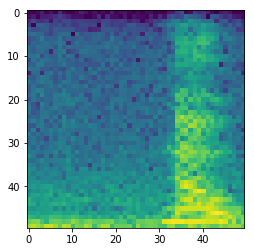

In [12]:
#show one image
plt.imshow(data[456])

In [13]:
# Flatten
# 50, 50 -> 2500
#single_image = data[0].flatten()

In [14]:
#single_image.shape

In [15]:
#new_image = single_image.reshape(129, 256, 3)

In [16]:
#random_df = pd.DataFrame(single_image)

In [17]:
#random_df = random_df.T

In [18]:
#random_df[-1] = [0]

In [19]:
#random_df

In [20]:
data = data/255

In [21]:
print("min of pixel : " + str(data[0].min()))
print("max of pixel : " + str(data[0].max()))

min of pixel : 0.015686275
max of pixel : 0.7529412


In [22]:

#concatenate all the flattened spectrograms in order
fl_data = np.empty((4800,2500), dtype=np.float32)

for i in range(len(data)):
    flat = data[i].flatten()
    fl_data[i] = flat

In [23]:

# check if transferred all
print("size : " + str(fl_data.shape))
print(fl_data[-1])


size : (4800, 2500)
[0.01568628 0.01568628 0.01568628 ... 0.49803922 0.48235294 0.5019608 ]


In [24]:
#for i in range(30):
#    print(i % 10)

In [25]:
#unique
def unique(list1): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x)
    # print list 
    for x in unique_list: 
        print (x) 

In [26]:
# create labels
label = np.zeros((400,), dtype=int)

for i in range(1, 12):
    label = np.concatenate((label, np.repeat(i, 400)))

In [27]:
# check uniques
unique(label)

0
1
2
3
4
5
6
7
8
9
10
11


In [28]:
print(label.shape)
print(type(label[0]))

(4800,)
<class 'numpy.int64'>


In [29]:

#one hot encode the lable
b = np.zeros((label.size, label.max()+1))
b[np.arange(label.size), label] = 1
labels = b


In [30]:

print(fl_data.shape)
print(labels.shape)


(4800, 2500)
(4800, 12)


### check on prepared datasets

In [31]:
print(fl_data.shape)
print(label.shape)

(4800, 2500)
(4800,)


### Before dividing into train and test sets, let's combine so we can shuffle

In [32]:
a=np.concatenate((fl_data, labels), axis=1)
a.shape

(4800, 2512)

In [33]:
#shuffle
np.random.shuffle(a)

In [34]:
#how to slice the labels again
new_labels=a[:,-12:]#.sum()
new_labels.shape

(4800, 12)

In [35]:
#how to slice the train again
train_data=a[:,:2500]
train_data.shape

(4800, 2500)

In [36]:
#from sklearn.model_selection import train_test_split
#x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size = 0.2)
#x_train.shape, x_val.shape, y_train.shape, y_val.shape

In [37]:

x_train = train_data[:4000]
print("train : " + str(x_train.shape))
x_val = train_data[4000:]
print("train validation : " + str(x_val.shape))
y_train = new_labels[:4000]
print("train label : " + str(y_train.shape))
y_val = new_labels[4000:]
print("train validation label : " + str(y_val.shape))


train : (4000, 2500)
train validation : (800, 2500)
train label : (4000, 12)
train validation label : (800, 12)


In [38]:
"""
#change data types to df
x_train = pd.DataFrame(x_train)
x_validation = pd.DataFrame(x_validation)
y_train = pd.DataFrame(y_train)
y_validation = pd.DataFrame(y_validation)
"""

'\n#change data types to df\nx_train = pd.DataFrame(x_train)\nx_validation = pd.DataFrame(x_validation)\ny_train = pd.DataFrame(y_train)\ny_validation = pd.DataFrame(y_validation)\n'

In [39]:
type(x_train)

numpy.ndarray

In [40]:
type(x_train[:2][0][0])

numpy.float64

In [41]:
x_train.shape

(4000, 2500)

## CNN Helper f(x)

In [42]:
# Weight initialization function
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return (tf.Variable(init_random_dist))

In [43]:
# Bias initialization function
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

In [44]:
# 2d convolution function which is already performed by tf
def conv2d(x, W):
    # x => input tensor ==> [batch, H, W, Channels]
    # W => kernel => [filter height, filter width, # of channels in, # channels out]
    return tf.nn.conv2d(x, W, strides=[1,1,1,1],padding="SAME")
# padding with SAME adds zeros to the end
# Strides is how you want to move in the whole thing [batch, height, width, channel]

In [45]:
# Pooling function in this case max pooling which gets the max value and is a 2x2 kernel
def max_pool_2by2(x):
    # x=> input => [batch, h, w, c]
    return (tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME"))
# Ksize = size of the window which makces the pooling [batch, h, w, c] => here 1 is like pasing all 2 is reducing
    # We only want to reduce the height and width of the image, that is why we use 
    # [1 in batch, 2 in height, 2 in width, 1 in channel]
#  Stride here is [1, 2, 2, 1] because we want to shorten the image so we jump 2 by 2 pixels in the image

In [46]:
# convolutional layer function
def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]]) 
    # we take the third one because that is the number of channels we are using
    # is not really intuitive but the channels is like the number of features
    # first is going to be 1 then more
    return (tf.nn.relu(conv2d(input_x, W)+b))

In [47]:
# normal layaer (fully connected layer)
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1]) 
    # we use the index one beacause 0 is the batch size and 1 is the number of nodes
    W = init_weights([input_size, size])
    b = init_bias([size])
    return (tf.matmul(input_layer, W)+b)
# simple weighted sum

## Model

In [48]:
x = tf.placeholder(tf.float32, shape=[None, 2500])
y_true = tf.placeholder(tf.float32, shape=[None, 12])

In [49]:
x_image = tf.reshape(x, [-1, 50, 50, 1])

In [50]:
convo_1 = convolutional_layer(x_image, shape=[25,25,1,4])
convo_1_pooling = max_pool_2by2(convo_1)

In [51]:
convo_2 = convolutional_layer(convo_1_pooling, shape=[12,12,4,4])
convo_2_pooling = max_pool_2by2(convo_2)

In [52]:
convo_3 = convolutional_layer(convo_2_pooling, shape=[6,6,4,4])
convo_3_pooling = max_pool_2by2(convo_3)

In [53]:
convo_2_flat = tf.reshape(convo_3_pooling,[-1, 1960])

In [64]:
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat, 100*10))

In [65]:
hold_prob = tf.placeholder(tf.float32)
full_one_dropout = tf.nn.dropout(full_layer_one, keep_prob=hold_prob)

In [66]:
y_pred = normal_full_layer(full_one_dropout, 12)

In [67]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y_pred))

In [68]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train = optimizer.minimize(cross_entropy)

In [69]:
correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y_true,1))
acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

tf.summary.scalar("accuracy", acc)

<tf.Tensor 'accuracy_1:0' shape=() dtype=string>

In [70]:
#variable initializer
init = tf.global_variables_initializer()

In [71]:
#savers
saver = tf.train.Saver()

In [72]:
#summaries for tensorboard
merged_summary_op = tf.summary.merge_all() # this will get all the summaries from the graph and join them

In [73]:
steps = 1000
batch_size = 10

with tf.Session() as sess:
    sess.run(init)

    # to use tensorboard you need to have a file writer to keep the logs
    train_writer = tf.summary.FileWriter("./tensorboard/train", graph=tf.get_default_graph())
    validation_writer = tf.summary.FileWriter("./tensorboard/validation", graph=tf.get_default_graph())
    
    for i in range(steps + 1):
        
        rand_ind = np.random.randint(len(x_train), size=batch_size)
        # Here we add hold_prob to our feed dictionary because it is a placeholder
        feed = {x:x_train[rand_ind], y_true:y_train[rand_ind], hold_prob:0.6}
        sess.run(train, feed_dict=feed)
        
        
        # When runnining you need to append logs for tensorboard
        if i%100 == 0:
            summary = sess.run(merged_summary_op,
                                      {x:x_train[rand_ind], y_true:y_train[rand_ind], hold_prob:1.0})
            train_writer.add_summary(summary, i)
            train_writer.flush()
            summary = sess.run(merged_summary_op,
                                      {x:x_val, y_true:y_val, hold_prob:1.0})
            validation_writer.add_summary(summary, i)
            validation_writer.flush()
            print("tensorboard summary at #{}".format(i))
    
    saver.save(sess, "cnn_model/cnn.ckpy")

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_2' with dtype float
	 [[{{node Placeholder_2}} = Placeholder[dtype=DT_FLOAT, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Placeholder_2', defined at:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.6/dist-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 427, in run_forever
    self._run_once()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 1440, in _run_once
    handle._run()
  File "/usr/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/usr/local/lib/python3.6/dist-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/usr/local/lib/python3.6/dist-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 370, in dispatch_queue
    yield self.process_one()
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 346, in wrapper
    runner = Runner(result, future, yielded)
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 1080, in __init__
    self.run()
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2817, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2843, in _run_cell
    return runner(coro)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 3018, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 3183, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 3265, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-55-9ba37e570df2>", line 1, in <module>
    hold_prob = tf.placeholder(tf.float32)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/array_ops.py", line 1745, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gen_array_ops.py", line 5020, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/ops.py", line 3272, in create_op
    op_def=op_def)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/ops.py", line 1768, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_2' with dtype float
	 [[{{node Placeholder_2}} = Placeholder[dtype=DT_FLOAT, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


# Predictions

In [ ]:
#test_data = np.empty((158538,50,50), dtype=np.float32)
test_data = np.empty((1000,50,50), dtype=np.float32)

In [ ]:
test = os.listdir('../input/audio_test/')

In [ ]:
index = 0
image_name_list = test
for image_name in image_name_list[:1000]:
    imageA = Image.open('../input/audio_test/' + image_name).resize((50,50))
    test_data[index] = imageA
    index+=1
    if index%1000==0:
        print(index)

In [ ]:
fl_test_data = np.empty((1000,2500), dtype=np.float32)

for i in range(len(test_data)):
    flat = test_data[i].flatten()
    fl_test_data[i] = flat

In [ ]:
fl_test_data.shape

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, "cnn_model/cnn.ckpy")
    
    prediction = y_pred
    predictions = sess.run(prediction, feed_dict={x:fl_test_data, hold_prob:1.0})
    result = []
    decode = tf.argmax(predictions, axis=1)
    result = sess.run(decode)
    print (result)